In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

np.random.seed(0)

## 1. 2D network: mutual excitation

The firing rate model is described by the following system of coupled differential equations:

dx(t)/dt = -x(t) + f(w2y(t) + I)

dy(t)/dt = -y(t) + f(w1x(t) + I)


where x and y are the firing rates of the two neurons. 

THe synaptic strnegths are positive (they are excitatory): w1 = w2 = 0.4

I = -10 and is the external input. 

The actiavtion is the sigmoid funciton. f(s) = 50sigma(s) = 50*(1/1+e^-s)

In [4]:
def sigmoid_activation(s):
    return 50 * (1 / (1 + np.exp(-s)))

w = 0.4

I = -10

r_vals = np.arange(0, 100, 100)

## 2.1 Plot the dynamics 

Plot the evolution in time of the firing rate of the two neurons x(t) and y(t) for different initial conditions in the same plot

In [5]:
def coupled_neurons(I, w, r_vals, dt=0.1, time=100) -> dict:
    '''This funciton returns the firing rates of neuron x and y as dicitonaries, where the keys are the
    indexes of the firing rates passed in as a tuple of tuples'''
    
    dt = dt
    
    #initialize dictionaries to store the arrays
    x_vals = {}
    
    y_vals = {}

    # loop through the r_vals to initialize the arrays
    for i, _ in enumerate(r_vals):

        x_vals[i] = np.zeros(time)
        x_vals[i][0] = r_vals[i][0]
        y_vals[i] = np.zeros(time)
        y_vals[i][0] = r_vals[i][1]

    for keys in x_vals:
        for i in range(1, time):
            # Euler to simulate the dynamics
            x_vals[keys][i] = x_vals[keys][i-1] + (-x_vals[keys][i-1] + sigmoid_activation(w * y_vals[keys][i-1] + I)) * dt
            y_vals[keys][i] = y_vals[keys][i-1] + (-y_vals[keys][i-1] + sigmoid_activation(w * x_vals[keys][i-1] + I)) * dt   

    return x_vals, y_vals

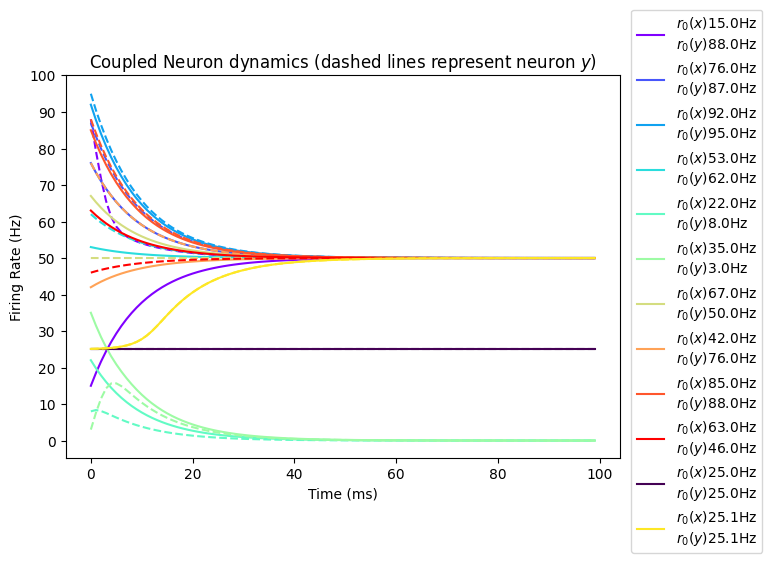

In [6]:
np.random.seed(37)
x_inits = np.random.randint(0, 100, 10)
y_inits = np.random.randint(0, 100, 10)
t = tuple(zip(x_inits, y_inits))

t_special = tuple(zip([25, 25.1], [25, 25.1]))

x, y = coupled_neurons(I, w, t)
x_special, y_special = coupled_neurons(I, w, t_special)


color = iter(cm.rainbow(np.linspace(0, 1, len(t))))
fig, ax = plt.subplots()

for i in x:
    c = next(color)
    ax.plot(x[i], label="$r_0(x)${}Hz\n$r_0(y)${}Hz".format(x[i][0], y[i][0]), color=c)
    ax.plot(y[i], color=c, linestyle='--')
color = iter(cm.viridis(np.linspace(0, 1, len(t_special))))
for i in x_special:
    c = next(color)
    ax.plot(x_special[i], label="$r_0(x)${}Hz\n$r_0(y)${}Hz".format(x_special[i][0], y_special[i][0]), color=c)
    ax.plot(y_special[i], color=c, linestyle='--')

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Coupled Neuron dynamics (dashed lines represent neuron $y$)')
ax.set_yticks(np.arange(0, 110, 10))
fig.legend(bbox_to_anchor=[1.21, 1.07])
fig.tight_layout()
fig.savefig('coupled_neurons.png', bbox_inches='tight')

## 2.2 + 2.3

Plot the trajectories in hthe state space for different initial conditions (i.e., plot x(t) vs y(t) for different values of x(0), y(0))

plot nullclines

In [7]:
def x_clines(I, w, vals) -> dict:
    '''This function returns the nullclines for the x neuron'''
    
    null_clines = {}

    x_vals = sigmoid_activation(w * vals + I)

    y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w  

    null_clines['x'] = x_vals
    null_clines['y'] = y_vals

    return null_clines


def y_clines(I, w, vals) -> dict:
    '''This funciton returns the nullclines for the y neuron'''

    null_clines = {}

    y_vals = sigmoid_activation(w * vals + I)

    x_vals = np.log((50/vals) - 1) + I / -w

    null_clines['x'] = x_vals
    null_clines['y'] = y_vals

    return null_clines

In [8]:
# random numbers
x_random = np.random.randint(0, 100, 500)
y_random = np.random.randint(0, 100, 500)

#initialize the tuples
random = tuple(zip(x_random, y_random))

#simulate the dynamics
x_random, y_random = coupled_neurons(I, w, random)
null_clines_x = x_clines(I, w, np.arange(0, 100, 0.1))
null_clines_y = y_clines(I, w, np.arange(0, 100, 0.1))

/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:8: RuntimeWarning: divide by zero encountered in divide
  y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:8: RuntimeWarning: divide by zero encountered in log
  y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:8: RuntimeWarning: invalid value encountered in log
  y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:23: RuntimeWarning: divide by zero encountered in divide
  x_vals = np.log((50/vals) - 1) + I / -w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:23: RuntimeWarning: divide by zero encountered in log
  x_vals = np.log((50/vals) - 1) + I / -w
/var/folders/6x/l0fbbg854pq

## 2.4 Find the fixed points numerically

In [9]:
sol1_x = np.arange(0, 100, 0.1)[np.where(abs(np.arange(0, 100, 0.1) - null_clines_x['x']) < 1e-2)][0]
sol1_y = np.arange(0, 100, 0.1)[np.where(abs(np.arange(0, 100, 0.1) - null_clines_y['y']) < 1e-2)][0]

sol2_x = np.arange(0, 100, 0.1)[np.where(abs(np.arange(0, 100, 0.1) - null_clines_y['y']) < 1e-2)][1]
sol2_y = np.arange(0, 100, 0.1)[np.where(abs(np.arange(0, 100, 0.1) - null_clines_x['x']) < 1e-2)][1]

sol3_x = np.arange(0, 100, 0.1)[np.where(abs(np.arange(0, 100, 0.1) - null_clines_y['y']) < 1e-2)][2]
sol3_y = np.arange(0, 100, 0.1)[np.where(abs(np.arange(0, 100, 0.1) - null_clines_x['x']) < 1e-2)][2]

print(f"The fixed points of the system are: {sol1_x, sol1_y}, {sol2_x, sol2_y}, {sol3_x, sol3_y}")

The fixed points of the system are: (0.0, 0.0), (25.0, 25.0), (50.0, 50.0)


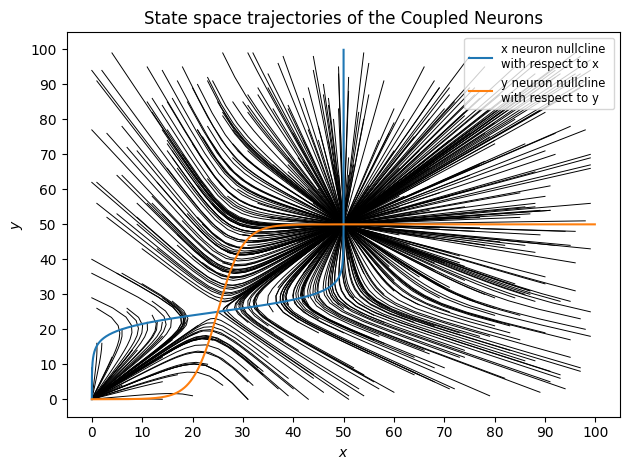

In [10]:
#Plot the state space trajectories
fig, ax = plt.subplots()
for i in x_random:
    ax.plot(x_random[i], y_random[i], color='black', lw=0.7)

ax.plot(null_clines_x['x'], 
        np.arange(0, 100, 0.1), 
        label='x neuron nullcline \nwith respect to x')
#ax.plot(np.arange(0, 100, 0.1), null_clines_x['y'], label='x neuron nullcline \nwith respect to y')


ax.plot(np.arange(0, 100, 0.1), 
        null_clines_y['y'], 
        label='y neuron nullcline \nwith respect to y ')
#ax.plot(null_clines_y['x'], np.arange(0, 100, 0.1), label='y neuron nullcline\nwith respect to x')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xticks(np.arange(0, 110, 10))
ax.set_yticks(np.arange(0, 110, 10))
ax.set_title('State space trajectories of the Coupled Neurons')
ax.legend(loc='upper right', fontsize='small')
fig.tight_layout()
fig.savefig('state_space.png')

In [11]:
# Quick calculations of PDEs

(sigmoid_activation((0.4 * 25) - 10) * (1 - (sigmoid_activation((0.4 * 25) - 10)/50))) * 0.4
    

5.0

## 2.6 More Bifuraction:

Decrease the input current from -10 to -20 and observe how the nullclines plot varies. 

Compute the number of solutions as I varies, and plot the bifurcation diagram as a a funciton of I. How many regimes exist?

In [12]:
def coupled_derivatives(x_vals, y_vals, I, w)-> tuple:
    '''This function returns the derivatives of the coupled neurons'''
    
    dx = -x_vals + sigmoid_activation(w * y_vals + I)
    dy = -y_vals + sigmoid_activation(w * x_vals + I)
    
    return dx, dy

In [13]:
random_ints = np.random.randint(0, 100, 100)
linear_vals = np.linspace(-5, 100, 100)

/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:8: RuntimeWarning: divide by zero encountered in divide
  y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:8: RuntimeWarning: divide by zero encountered in log
  y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:8: RuntimeWarning: invalid value encountered in log
  y_vals = np.log((50/vals) - 1) + I / -w #-np.log((50/vals) - 1) - I / w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:23: RuntimeWarning: divide by zero encountered in divide
  x_vals = np.log((50/vals) - 1) + I / -w
/var/folders/6x/l0fbbg854pqbfdbyjrvbllrm0000gn/T/ipykernel_70028/3317454255.py:23: RuntimeWarning: divide by zero encountered in log
  x_vals = np.log((50/vals) - 1) + I / -w
/var/folders/6x/l0fbbg854pq

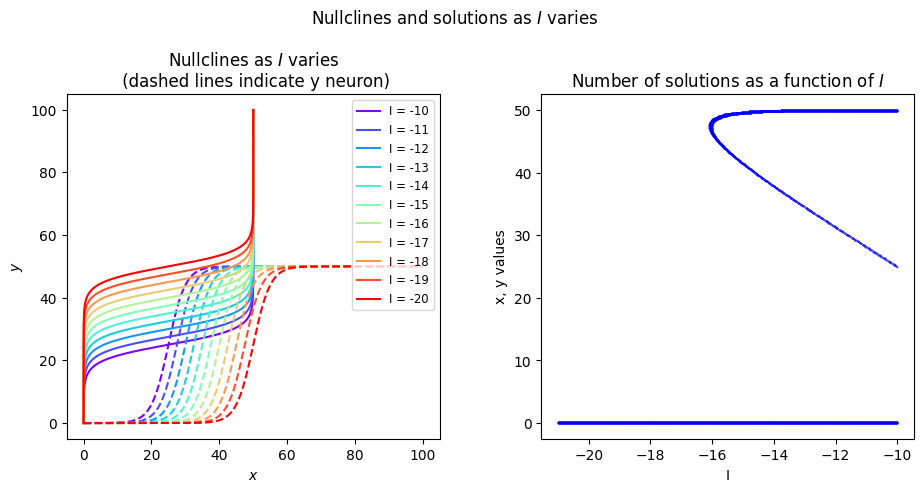

In [14]:
I_array_clines = np.arange(-10, -21, -1)

I_array_solutions = np.linspace(-10, -20, 10000)
m = np.array([])

for i, j in enumerate(I_array_solutions):
    dx, dy = coupled_derivatives(linear_vals, linear_vals, j, w)
    m = np.append(m, (np.diff(np.sign(dx))!= 0).sum())

color = iter(cm.rainbow(np.linspace(0, 1, len(I_array_clines))))
fig, (ax1, ax2) = plt.subplots(1, 2)

for val in I_array_clines:
    c= next(color)
    ax1.plot(x_clines(val, w, np.arange(0, 100, 0.1))['x'], 
             np.arange(0, 100, 0.1), label='I = {}'.format(val), 
             color=c)

    ax1.plot(np.arange(0, 100, 0.1), 
             y_clines(val, w, np.arange(0, 100, 0.1))['y'], 
             color=c, 
             linestyle='--')

ax1.legend(loc='upper right', fontsize='small')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Nullclines as $I$ varies\n (dashed lines indicate y neuron)')

vals = np.arange(0, 100, 0.1)
I_vals = np.arange(-10, -21, -0.01)
solutions = []

for i in I_vals:
    xs = x_clines(i, w, vals)
    ys = y_clines(i, w, vals)

    indicies_x = np.where(abs(vals - xs['x']) < 1e-1)[0]
    #sols_y = np.where(abs(vals - ys['y']) < 1e-2)[0]

    for j in indicies_x:
        solutions.append((i, vals[j]))
    #solutions.append((i, sols_x))

for i in solutions:
    ax2.scatter(i[0], i[1], color='blue', s=0.1)

ax2.set_xlabel('I')
ax2.set_ylabel('x, y values')
ax2.set_title('Number of solutions as a function of $I$')

fig.suptitle('Nullclines and solutions as $I$ varies')
fig.tight_layout()
fig.set_size_inches(10, 5)

fig.savefig('clines_and_solutions.png')